<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Rescaling" data-toc-modified-id="Rescaling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rescaling</a></span></li></ul></li><li><span><a href="#ML-Modelling" data-toc-modified-id="ML-Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ML Modelling</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prediction</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
import requests
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model    import ElasticNet
from sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing   import MinMaxScaler



# Loading Data

In [2]:
csv_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_raw = pd.read_csv(csv_url, sep=";")
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preparation

In [3]:
df1 = df_raw.copy()

In [4]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Rescaling

In [5]:
mms = MinMaxScaler()
df1["free sulfur dioxide"] = mms.fit_transform(df1[["free sulfur dioxide"]].values)
pickle.dump(mms, open("free_sulfur_scaler.pkl","wb"))

In [6]:
df1["total sulfur dioxide"] = np.log1p(df1[["total sulfur dioxide"]])
df1["total sulfur dioxide"] = mms.fit_transform(df1[["total sulfur dioxide"]].values)
pickle.dump(mms, open("total_sulfur_scaler.pkl","wb"))

C:\Users\b4a\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide'>

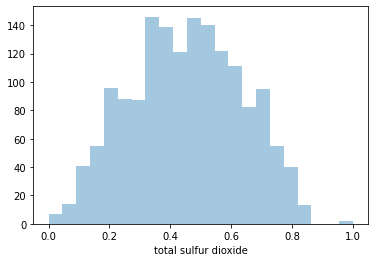

In [7]:
sns.distplot(df1["total sulfur dioxide"], kde=False)

In [8]:
train, test = train_test_split(df1)


In [9]:
x_train = train.drop("quality", axis=1)
y_train = train["quality"]

x_test = test.drop("quality", axis=1)
y_test = test["quality"]

# ML Modelling

In [10]:
model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

In [11]:
model.fit(x_train, y_train)

ElasticNet(alpha=0.5, random_state=42)

In [12]:
pred = model.predict(x_test)

In [13]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
mae  = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("RMSE:{}".format(rmse))
print("MAE:{}".format(mae))
print("R2:{}".format(r2))

RMSE:0.7545055694004068
MAE:0.6331582530261812
R2:0.11981963703570486


In [14]:
pickle.dump(model, open("model_wine_quality.pkl", "wb"))

# Prediction

In [14]:
df_raw.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5


In [15]:
df=df_raw.drop('quality', axis=1).sample()

In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
427,9.5,0.78,0.22,1.9,0.077,6.0,32.0,0.9988,3.26,0.56,10.6


In [17]:
df_json = df.to_json(orient='records')
df_json

'[{"fixed acidity":9.5,"volatile acidity":0.78,"citric acid":0.22,"residual sugar":1.9,"chlorides":0.077,"free sulfur dioxide":6.0,"total sulfur dioxide":32.0,"density":0.9988,"pH":3.26,"sulphates":0.56,"alcohol":10.6}]'

In [18]:
previsao = '[{"fixed acidity":8.0,"volatile acidity":0.78,"citric acid":0.15,"residual sugar":0.9,"chlorides":0.082,"free sulfur dioxide":36.0,"total sulfur dioxide":70.0,"density":0.99585,"pH":3.39,"sulphates":0.13,"alcohol":20.05}]'

url = 'http://127.0.0.1:5000/predict'
url_heroku = 'https://wine-quality-webapp.herokuapp.com/predict'
data = df_json
headers = {'Content-type': 'application/json'}

r = requests.post(url=url_heroku, data=data, headers=headers)

In [19]:
r.status_code

200

In [20]:
pd.DataFrame(r.json(), columns=r.json()[0].keys())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction
0,9.5,0.78,0.22,1.9,0.077,0.43662,8.070442,0.9988,3.26,0.56,10.6,5.639766


In [21]:
r.json()[0].keys()

dict_keys(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'prediction'])